<a href="https://colab.research.google.com/github/omkar-goilkar/LGMVIP-DATASCIENCE/blob/main/INTERMEDIATE_LEVEL_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **DATA SCIENCE INTERN AT LETSGROWMORE LGMVIP january 2022 BATCH**

**NAME: OMKAR GOILKAR**

**INTERMEDIATE LEVEL TASK1 :  Exploratory-Data-Analysis-on-Dataset--Terrorism**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import pandas as pd
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
14254,198108290004,1981,8,29,NaN,0,NaN,97,Israel,10,Middle East & North Africa,Jerusalem,Jerusalem,31.771599,35.203400,1.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,Insurgency/Guerilla Action,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,4.0,Military,NaN,NaN,NaN,"Army Cooperative Society, Herzel Street",...,NaN,NaN,Explosive; Bomb - timed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1.0,0.0,0.0,1.0,NaN
14255,198108290005,1981,8,29,NaN,0,NaN,15,Austria,8,Western Europe,Vienna,Vienna,48.208174,16.373819,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,15.0,Religious Figures/Institutions,86.0,Place of Worship,NaN,Synagogue Seitenstettengasse,...,NaN,NaN,Grenades; Automatic firearm,2.0,NaN,NaN,19.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
14256,198108290006,1981,8,29,NaN,0,NaN,94,Iran,10,Middle East & North Africa,Fars,Kamfiruz,30.318812,52.198101,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,1.0,Business,7.0,Retail/Grocery/Bakery,NaN,3 food shops,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,"Damages: arson, damaged 3 shops (foodshops)",0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
14257,198108290007,1981,8,29,NaN,0,NaN,94,Iran,10,Middle East & North Africa,Tehran,Tehran,35.724533,51.405190,1.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,Insurgency/Guerilla Action,0.0,1.0,0.0,9.0,Unknown,NaN,NaN,NaN,NaN,4.0,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,NaN,Revolutionary Committee Office,...,NaN,NaN,Assault,0.0,NaN,NaN,4.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
14258,198108300001,1981,8,30,NaN,0,NaN,155,West Bank and Gaza Strip,10,Middle Ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Columns: 135 entries, eventid to related
dtypes: float64(74), int64(7), object(54)
memory usage: 14.7+ MB


In [5]:
data.describe()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.425900e+04,14259.000000,14259.000000,14259.000000,14259.000000,14259.000000,14259.000000,13772.000000,13772.000000,14258.000000,14258.000000,14258.000000,14258.000000,14258.000000,14258.000000,1858.000000,14258.000000,14258.000000,14258.0,14258.000000,24.000000,2.000000,14258.000000,13408.000000,14218.000000,192.000000,137.000000,166.000000,20.000000,12.000000,20.000000,0.0,0.0,0.0,14258.000000,31.000000,0.0,14258.000000,3068.000000,912.000000,...,233.000000,9.000000,8.000000,0.0,0.0,0.0,18.000000,14258.000000,11420.00000,868.000000,746.000000,114.000000,101.000000,18.000000,15.000000,12175.000000,1263.000000,1364.000000,10792.000000,1234.000000,1236.000000,14258.000000,6407.000000,3.299000e+03,14104.000000,1183.000000,1183.000000,337.000000,250.000000,14008.000000,3.900000e+02,1.0,8.300000e+01,1.0,573.000000,448.000000,14258.000000,14258.000000,14258.000000,14258.000000
mean,1.977436e+11,1977.372537,6.181079,15.198261,0.021530,192.658461,5.705940,29.405349,-25.804561,1.228994,0.009959,0.991303,0.990251,0.898794,-1.522303,1.289020,0.048183,0.904264,0.0,3.194066,4.708333,3.000000,6.630102,39.480832,145.659727,9.416667,50.569343,178.542169,7.000000,45.416667,161.750000,NaN,NaN,NaN,0.039276,0.387097,NaN,0.002455,-14.423403,-80.486842,...,4.424893,0.888889,2.750000,NaN,NaN,NaN,0.444444,6.662786,10.79711,6.321429,9.576408,6.052632,6.495050,6.166667,9.133333,1.199918,0.184481,0.348974,1.253706,0.394652,0.051780,0.598261,3.428906,1.829172e+05,0.083877,-7.841082,0.253593,2.570475,30.572000,0.027913,3.801887e+06,20000.0,1.426646e+06,0.0,2.895288,7.303571,-3.559896,-3.512344,0.285734,-2.428111
std,3.139999e+08,3.143381,3.360118,8.980147,0.145149,175.618845,3.355184,22.209016,55.534477,0.866373,0.099302,0.092854,0.098258,0.301612,3.561831,0.578653,0.214161,0.294239,0.0,2.040586,2.475606,1.414214,6.091475,30.068946,80.755681,6.914840,28.708165,81.189983,5.991222,25.061591,66.262536,NaN,NaN,NaN,0.194258,0.495138,NaN,0.049486,57.513563,39.140713,...,2.986273,0.333333,2.964071,NaN,NaN,NaN,0.511310,2.409397,7.05308,1.858712,6.888386,1.981517,6.221935,1.248529,6.621034,6.507691,1.060759,2.589823,7.627515,2.460524,0.320281,0.877854,0.526145,1.780330e+06,0.277213,138.764771,4.440424,56.031099,71.603359,0.164728,5.094505e+07,NaN,4.988971e+06,NaN,1.272158,26.432842,4.524166,4.573991,0.647098,4.484891
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,21.000000,1.000000,8.000000,45.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,2.000000,1.00000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.976020e+11,1976.000000,3.000000,7.000000,0.000000,69.000000,2.000000,13.743611,-80.214195,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.

In [6]:
data.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [7]:
data.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    14238
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       13573
Length: 135, dtype: int64

In [8]:
for i in data.columns:
    print(i, end=" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [9]:
cols = data.columns

In [10]:
cols = []
for i in cols:
    if data[i].isnull().sum() > 1500000:
        cols.append(i)

In [ ]:
data = data.drop(cols, axis=1)

In [ ]:
data.shape

(16581, 135)

In [11]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [12]:
countries_with_most_terrorism = data.country_txt.value_counts().head(10)
countries_with_most_terrorism

United Kingdom    1861
United States     1587
El Salvador       1585
Italy             1181
Spain             1175
Colombia           659
Guatemala          632
France             612
Turkey             585
Nicaragua          345
Name: country_txt, dtype: int64

In [13]:
countries = list(countries_with_most_terrorism.index)
countries

['United Kingdom',
 'United States',
 'El Salvador',
 'Italy',
 'Spain',
 'Colombia',
 'Guatemala',
 'France',
 'Turkey',
 'Nicaragua']

Text(0.5, 1.0, 'Countries with most terrorism')

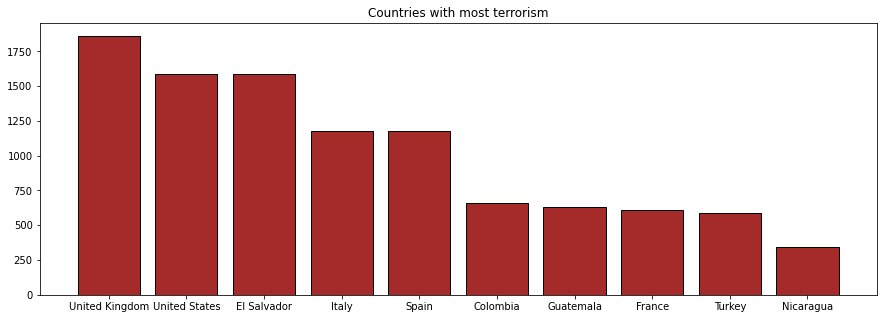

In [14]:
x, y = countries_with_most_terrorism.index, countries_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y,align="center",edgecolor="black",color="brown")
plt.xticks(rotation=0)
plt.title("Countries with most terrorism")

In [15]:
# Filtering country data
data_countries = data[data['country_txt'].isin(countries)]
data_countries.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0.0,NaN,1/1/1970: Unknown African American assailants ...,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,2.0,Armed Assault,NaN,NaN,NaN,NaN,3.0,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,1.0,1.0,1.0,1.0,2.0,Other Crime Type,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,21.0,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),22500.0,Three transformers were damaged.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0.0,NaN,"1/2/1970: Karl Armstrong, a member of the New ...",1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,4.0,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",...,NaN,NaN,Firebomb consisting of gasoline,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),60000.0,"Basketball courts, weight room, swimming pool,...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0.0,NaN,"1/3/1970: Karl Armstrong, a member of the New ...",1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,2.0,Government (General),21.0,Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,...,NaN,NaN,Poured gasoline on the floor and lit it with a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Slight damage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
10,19700105

In [16]:
# Displaying only column names of country data.
data_countries.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [17]:
# Filtering top 10 Countries on which max attacks by terrorists
raw_data = data_countries.iyear.value_counts().head(10)
raw_data

1979    1881
1980    1854
1978    1138
1981    1093
1977    1066
1976     663
1975     554
1970     505
1972     407
1971     389
Name: iyear, dtype: int64

Text(0.5, 1.0, 'Years with most number of terrorism actively.')

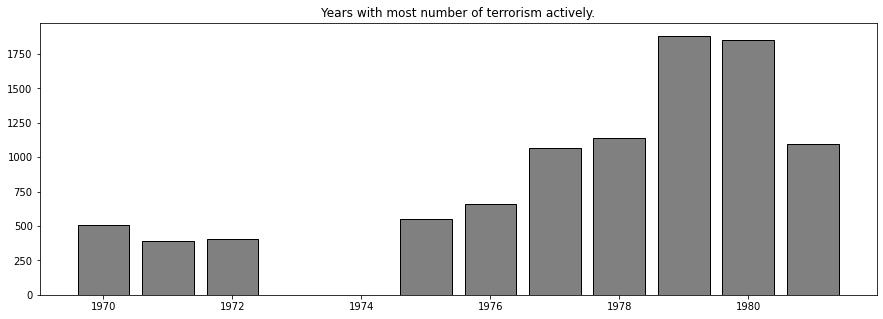

In [18]:
# Displaying years with most number of terrorism activities happend.

year = raw_data
x, y = year.index, year.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "Black", color = "grey")
plt.xticks(rotation=0)
plt.title("Years with most number of terrorism actively.")

Text(0.5, 1.0, 'Type of Target')

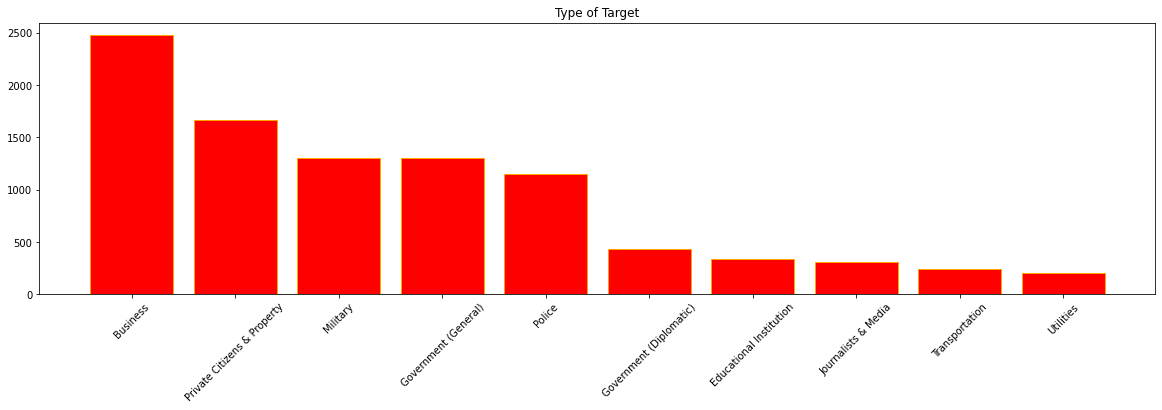

In [19]:
# Top 10 Targets that are attacked most by terrorists

target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(target.index, target.values, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Type of Target")

(-1.1096782849961673,
 1.1715858354510125,
 -1.1119943987121186,
 1.1855739174783857)

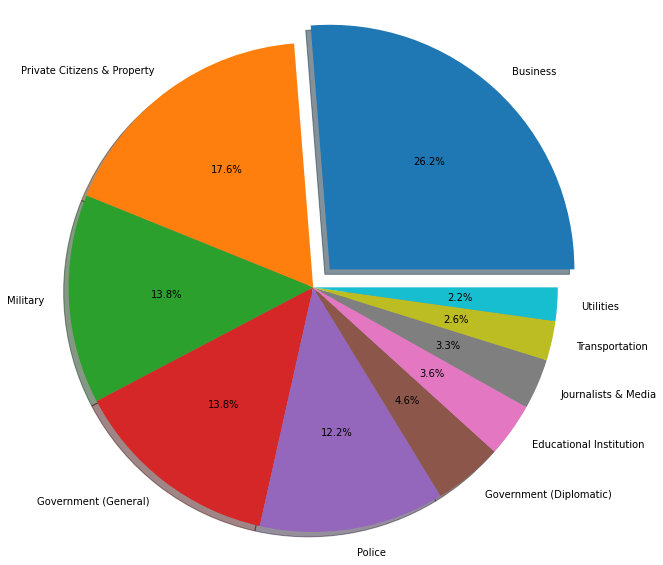

In [20]:
target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,10))
explode = (0.1,0,0,0,0,0,0,0,0,0)  # Only "Explodes" the 2nd slice(i.e. 'Hogs')

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(target.values, explode = explode, labels = target.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

Text(0.5, 1.0, 'Type of Attacks')

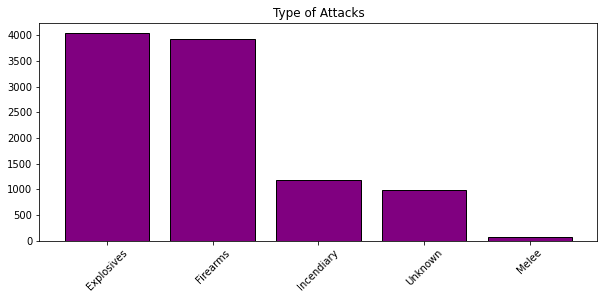

In [21]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fix,ax = plt.subplots(figsize=(10,4))
ax.bar(weapon_types.index, weapon_types.values, edgecolor="black", color = "purple")
plt.xticks(rotation=45)
plt.title("Type of Attacks")

(-1.1998734394891017,
 1.1383916314206615,
 -1.182545626708245,
 1.2215324252258934)

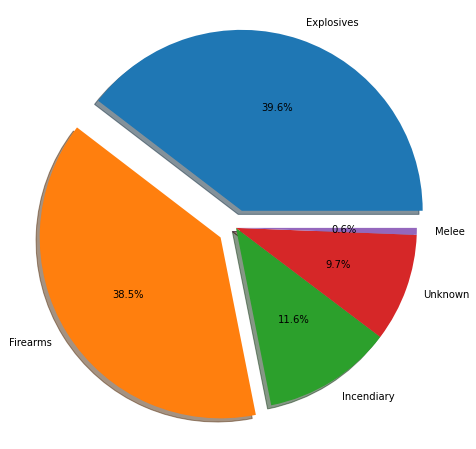

In [22]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0.1,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(weapon_types.values, explode = explode, labels = weapon_types.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

(-1.1998734394891017,
 1.1383916314206615,
 -1.182545626708245,
 1.2215324252258934)

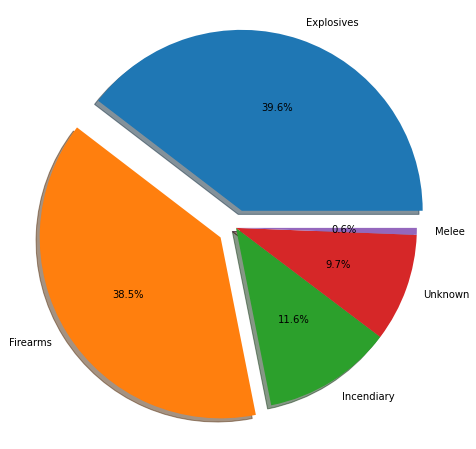

In [23]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0.1,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(weapon_types.values, explode = explode, labels = weapon_types.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [24]:
data.attacktype1_txt.value_counts()

Bombing/Explosion                      6021
Assassination                          2903
Armed Assault                          2434
Facility/Infrastructure Attack         1371
Hostage Taking (Kidnapping)             747
Unknown                                 429
Hostage Taking (Barricade Incident)     243
Hijacking                                82
Unarmed Assault                          28
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Type of Attacks')

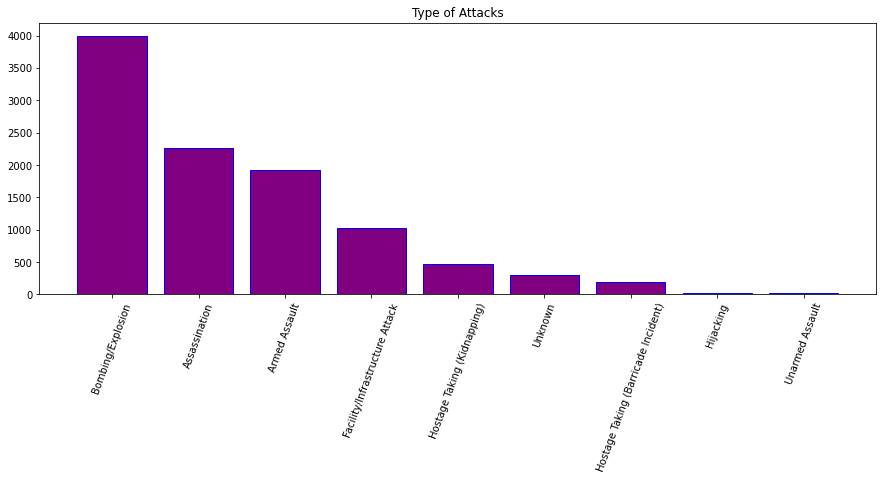

In [25]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(attack_type.index,attack_type.values, edgecolor = "blue", color = "purple")
plt.xticks(rotation=70)
plt.title("Type of Attacks")

(-1.1043969927072423,
 1.1352893645707638,
 -1.1232210370830966,
 1.2193313396399672)

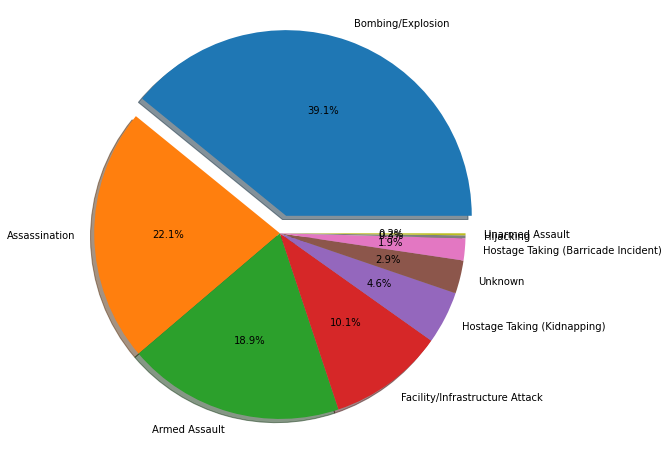

In [26]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(attack_type.values, explode = explode, labels = attack_type.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [27]:
# Top 10 most cities where terrorist attacks actioned by terrorists.

cities_with_most_terrorism = data.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
cities_with_most_terrorism

Belfast           900
San Salvador      735
Unknown           646
Rome              429
New York City     346
Paris             323
Guatemala City    269
Madrid            221
Buenos Aires      208
Istanbul          186
Name: city, dtype: int64

Text(0.5, 1.0, 'Cities with most terrorism')

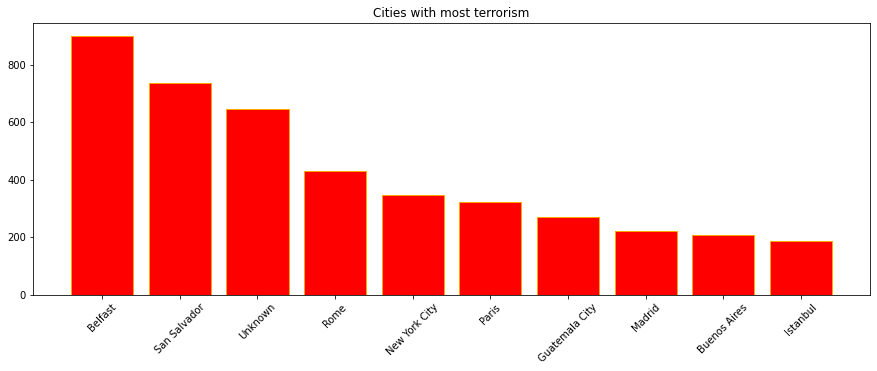

In [28]:
# Graphical representation of top 10 Cities with most terrorism.
x, y = cities_with_most_terrorism.index,cities_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Cities with most terrorism")

Text(0.5, 1.0, 'Cities with most terrorism')

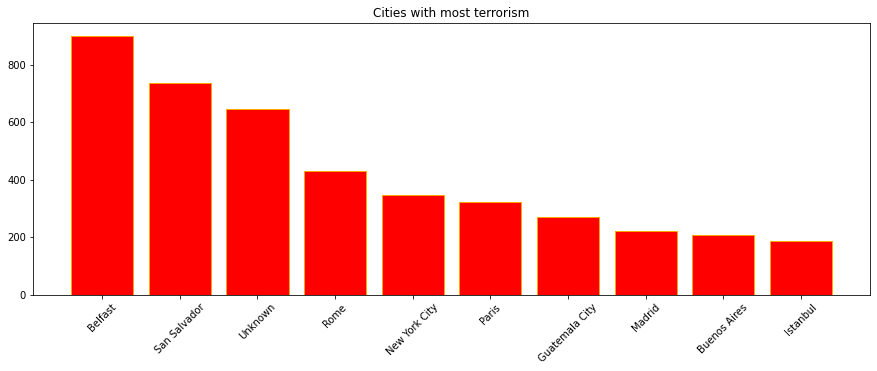

In [29]:
# Graphical representation of top 10 Cities with most terrorism.
x, y = cities_with_most_terrorism.index,cities_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Cities with most terrorism")

In [30]:
religios_target = data[data["targtype1_txt"]=="Religious Figures/Institutions"]
religios_target.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
35,197001280002,1970,1,28,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0.0,Front of building,1/28/1970: Unknown perpetrators detonated an e...,1.0,1.0,1.0,1.0,2.0,Other Crime Type,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,15.0,Religious Figures/Institutions,86.0,Place of Worship,Jewish Synagogue,Temple De Hirsch,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),3000.0,Small hole in the door,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,"""Synagogue Blasted,"" Tri City Herald, January ...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
49,197002060003,1970,2,6,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0.0,NaN,2/6/1970: Unknown perpetrators detonated a bom...,1.0,1.0,1.0,1.0,2.0,Other Crime Type,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,15.0,Religious Figures/Institutions,86.0,Place of Worship,Jewish Synagogue,NaN,...,NaN,NaN,Dynamite,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Door of synagogue damaged and windows shattere...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This might be linked with 197001280002. Both ...,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
117,197003090004,1970,3,9,NaN,0,NaN,217,United States,1,North America,Connecticut,Bridgeport,41.181880,-73.191269,1.0,0.0,NaN,3/9/1970: Unknown perpetrators firebombed Shil...,1.0,1.0,1.0,1.0,2.0,Other Crime Type,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,15.0,Religious Figures/Institutions,86.0,Place of Worship,African American Church,Shiloh Baptist Church,...,NaN,NaN,Firebomb,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Minor damage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
190,197004130003,1970,4,13,NaN,0,NaN,217,United States,1,North America,Missouri,Kansas City,39.176086,-94.574127,1.0,0.0,NaN,"4/13/1970: In a series of related attacks, unk...",1.0,1.0,1.0,1.0,2.0,Other Crime Type,1.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,15.0,Religious Figures/Institutions,86.0,Place of Worship,Linwood Methodist Church,"Linwood Methodist Church, Kansas City",...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Natural gas regulator of Church was destroyed....,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Part of a multiple attack with 197004130002 an...,Committee on Government Operations United Stat...,"""Teamster Walkouts Close More Plants,"" Washing...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,"197004130002, 197004130003, 197004130004"
204,197004190001,1970,4,19,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0.0,Capital Hill Area,"4/19/1970: In a simultaneous bombing campaign,...",1.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,15.0,Religious Figures/Institutions,86.0,Place of Worship,Church,Japanese Presbyterian Church,...,NaN,NaN,

Text(0.5, 1.0, 'Countries with most terrorism on religious Figures')

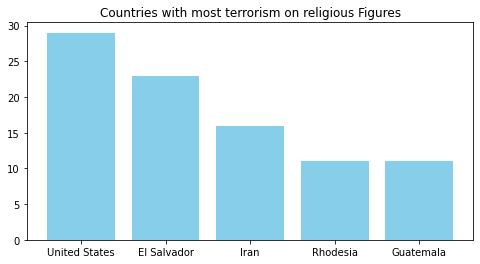

In [31]:
# Graphical representation of top 5 Countries with most terrorism on religious Figures or Institutions.

x, y = religios_target["country_txt"].value_counts().head().index,religios_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y, color = "skyblue")
plt.title("Countries with most terrorism on religious Figures")

(-1.1109402928643834,
 1.1560363148604285,
 -1.1108420144211264,
 1.1972231147835233)

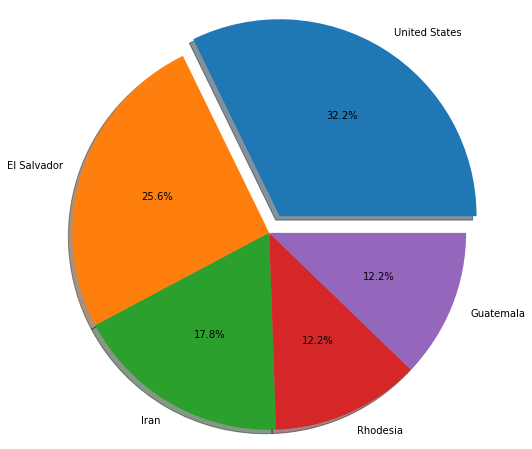

In [32]:
# Top 10 most type of attacks actioned by terrorists.

y, x = religios_target["country_txt"].value_counts().head().index,religios_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(x, explode = explode, labels = y, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.